In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('OiDj_merged.csv')


df['IsBus'] = np.where(df['net_mode'] == 1, 1, 0)
df['IsRail'] = np.where(df['net_mode'] == 2, 1, 0)

print(df.head())

   Unnamed: 0  idx      Ck1Road       Ck1Bus      Ck1Rail      Ck2Road  \
0           0  0.0  7875351.359  3020828.439  9164254.201  7864111.513   
1           1  1.0  7875351.359  3020828.439  9164254.201  7865522.820   
2           2  2.0  7875351.359  3020828.439  9164254.201  7863413.383   
3           3  3.0  7875351.359  3020828.439  9164254.201  7864066.587   
4           4  4.0  7875351.359  3020828.439  9164254.201  7865096.332   

        Ck2Bus      Ck2Rail    CkDiffRoad    CkDiffBus  ...    Oi_road_y  \
0  3018331.319  9177991.167 -11239.845770 -2497.120307  ...   350.334919   
1  3018647.914  9176263.266  -9828.538792 -2180.525344  ...   113.748712   
2  3018177.754  9178842.863 -11937.976120 -2650.685685  ...   118.006317   
3  3018320.702  9178046.710 -11284.771780 -2507.736989  ...   484.652069   
4  3018553.067  9176784.601 -10255.026640 -2275.372523  ...  1073.108343   

     Oi_bus_y    Oi_rail_y  Oi_net_j    Dj_road_y    Dj_bus_y    Dj_rail_y  \
0   55.094572   421.

In [3]:
df['CkRoad_frac'] = df['Ck2Road']/(df['Ck1Road']+df['Ck1Bus']+df['Ck1Rail'])
df['CkBus_frac'] = df['Ck2Bus']/(df['Ck1Road']+df['Ck1Bus']+df['Ck1Rail'])
df['CkRail_frac'] = df['Ck2Rail']/(df['Ck1Road']+df['Ck1Bus']+df['Ck1Rail'])


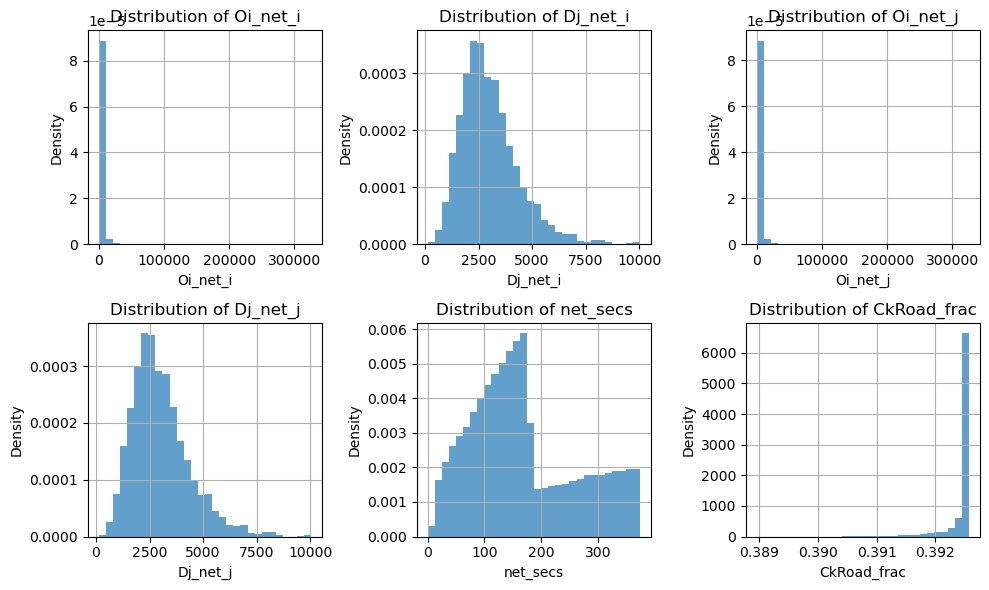

Skewness of the features:
Oi_net_i       22.914998
Dj_net_i        1.053682
Oi_net_j       22.197411
Dj_net_j        1.051096
net_secs        0.556393
CkRoad_frac    -4.121048
dtype: float64


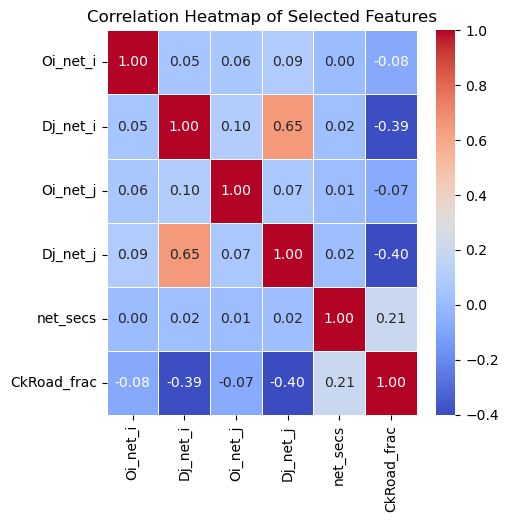

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

dafni_impacts_enriched_df = df

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten() 

# Plotting histograms for each feature
columns = ['Oi_net_i', 'Dj_net_i', 'Oi_net_j', 'Dj_net_j', 'net_secs','CkRoad_frac']
for i, column in enumerate(columns):
    row = i // 3 
    col = i % 3
    axs[i].hist(dafni_impacts_enriched_df[column], density=True, bins=30, alpha=0.7)
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_ylabel('Density')
    axs[i].set_xlabel(column)
    axs[i].grid(True)

# axs[-1].axis('off')

plt.tight_layout()
plt.show()

# Check the skewness
print("Skewness of the features:")
print(dafni_impacts_enriched_df[columns].skew())

# Heat map of correlation between features
selected_features = dafni_impacts_enriched_df[columns]
corr_matrix = selected_features.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


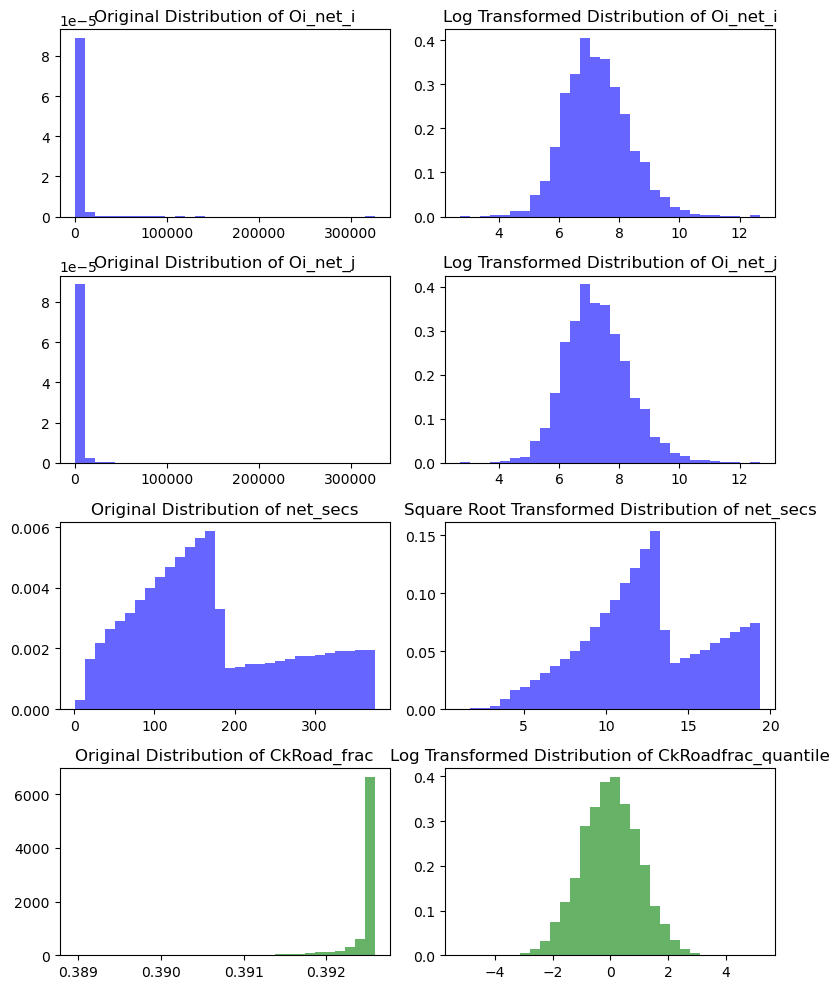

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

# Apply logarithmic conversion to correct for positive skewness
dafni_impacts_enriched_df['Oi_net_i_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_i'])
dafni_impacts_enriched_df['Oi_net_j_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_j'])

# Apply square root conversion to correct for negative bias (ensure no zero values)
dafni_impacts_enriched_df['net_secs_sqrt'] = np.sqrt(dafni_impacts_enriched_df['net_secs'] + 1) # Add 1 to avoid taking the square root of 0

#### correction for target
# dafni_impacts_enriched_df['CkRoadfrac_quantile'] = np.log1p(abs(dafni_impacts_enriched_df['CkRoad_frac']))
quantile_transformer = QuantileTransformer(output_distribution='normal', n_quantiles=1000)
dafni_impacts_enriched_df['CkRoad_frac'] = dafni_impacts_enriched_df['CkRoad_frac'].replace([np.inf, -np.inf], np.nan).dropna()
dafni_impacts_enriched_df['CkRoadfrac_quantile'] = quantile_transformer.fit_transform(dafni_impacts_enriched_df[['CkRoad_frac']])


fig, axs = plt.subplots(4, 2, figsize=(8, 10)) 

# Oi_net_i 
axs[0, 0].hist(dafni_impacts_enriched_df['Oi_net_i'], bins=30, density=True, alpha=0.6, color='blue')
axs[0, 0].set_title('Original Distribution of Oi_net_i')
axs[0, 1].hist(dafni_impacts_enriched_df['Oi_net_i_log'], bins=30, density=True, alpha=0.6, color='blue')
axs[0, 1].set_title('Log Transformed Distribution of Oi_net_i')

# Oi_net_j 
axs[1, 0].hist(dafni_impacts_enriched_df['Oi_net_j'], bins=30, density=True, alpha=0.6, color='blue')
axs[1, 0].set_title('Original Distribution of Oi_net_j')
axs[1, 1].hist(dafni_impacts_enriched_df['Oi_net_j_log'], bins=30, density=True, alpha=0.6, color='blue')
axs[1, 1].set_title('Log Transformed Distribution of Oi_net_j')

# net_secs 
axs[2, 0].hist(dafni_impacts_enriched_df['net_secs'], bins=30, density=True, alpha=0.6, color='blue')
axs[2, 0].set_title('Original Distribution of net_secs')
axs[2, 1].hist(dafni_impacts_enriched_df['net_secs_sqrt'], bins=30, density=True, alpha=0.6, color='blue')
axs[2, 1].set_title('Square Root Transformed Distribution of net_secs')

# CkRoadfrac_quantile 
axs[3, 0].hist(dafni_impacts_enriched_df['CkRoad_frac'], bins=30, density=True, alpha=0.6, color='green')
axs[3, 0].set_title('Original Distribution of CkRoad_frac')
axs[3, 1].hist(dafni_impacts_enriched_df['CkRoadfrac_quantile'], bins=30, density=True, alpha=0.6, color='green')
axs[3, 1].set_title('Log Transformed Distribution of CkRoadfrac_quantile')

plt.tight_layout()
plt.show()

In [7]:
# dafni_impacts_enriched_df.to_csv('dafni_impacts_enriched.csv', index=False)
dafni_impacts_enriched_df

,Unnamed: 0,idx,Ck1Road,Ck1Bus,Ck1Rail,Ck2Road,Ck2Bus,Ck2Rail,CkDiffRoad,CkDiffBus,...,Dj_net_j,IsBus,IsRail,CkRoad_frac,CkBus_frac,CkRail_frac,Oi_net_i_log,Oi_net_j_log,net_secs_sqrt,CkDiffRoad_log
0,0,0.0,7875351.359,3020828.439,9164254.201,7864111.513,3018331.319,9177991.167,-11239.845770,-2497.120307,...,3508.670636,0,1,0.392021,0.150462,0.457517,7.367077,6.719013,10.639426,9.327309
1,1,1.0,7875351.359,3020828.439,9164254.201,7865522.820,3018647.914,9176263.266,-9828.538792,-2180.525344,...,3540.944967,0,1,0.392091,0.150478,0.457431,7.367077,5.572154,7.601440,9.193147
2,2,2.0,7875351.359,3020828.439,9164254.201,7863413.383,3018177.754,9178842.863,-11937.976120,-2650.685685,...,3524.517321,0,1,0.391986,0.150454,0.457560,7.367077,5.613128,12.472545,9.387564
3,3,3.0,7875351.359,3020828.439,9164254.201,7864066.587,3018320.702,9178046.710,-11284.771780,-2507.736989,...,3967.800168,0,1,0.392019,0.150461,0.457520,7.367077,7.034388,11.459054,9.331298
4,4,4.0,7875351.359,3020828.439,9164254.201,7865096.332,3018553.067,9176784.601,-10255.026640,-2275.372523,...,4468.926742,0,1,0.392070,0.150473,0.457457,7.367077,7.798523,8.610208,9.235621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626486,626486,95.0,7875351.359,3020828.439,9164254.201,7870220.339,3019633.538,9170580.123,-5131.019735,-1194.901784,...,3554.976869,0,1,0.392326,0.150527,0.457148,7.367077,5.849325,12.780134,8.543255
626487,626487,96.0,7875351.359,3020828.439,9164254.201,7870334.825,3019674.409,9170424.766,-5016.533752,-1154.030782,...,3206.172435,0,1,0.392331,0.150529,0.457140,7.367077,6.955593,10.963050,8.520694
626488,626488,97.0,7875351.359,3020828.439,9164254.201,7866368.888,3018836.469,9175228.644,-8982.471459,-1991.970694,...,3161.143821,0,1,0.392134,0.150487,0.457379,7.367077,7.061334,5.810214,9.103142
626489,626489,98.0,7875351.359,3020828.439,9164254.201,7865194.903,3018579.088,9176660.009,-10156.456050,-2249.351935,...,3870.436089,0,1,0.392075,0.150474,0.457451,7.367077,7.467371,7.984576,9.225963


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Select feature columns for PCA
pca_features = ['Oi_net_i_log', 'Oi_net_j_log', 'Dj_net_i', 'Dj_net_j', 'net_secs_sqrt','IsBus','IsRail']

rows_before = dafni_impacts_enriched_df.shape[0]
dafni_impacts_enriched_df = dafni_impacts_enriched_df.dropna(subset=pca_features)
rows_after = dafni_impacts_enriched_df.shape[0]
rows_deleted = rows_before - rows_after
print(f"Deleted {rows_deleted} rows due to missing values.")


# standardized
scaler = StandardScaler()
features_scaled = scaler.fit_transform(dafni_impacts_enriched_df[pca_features])

# # Initialise the PCA 
# pca = PCA(n_components=5) 
# Explained variance ratio: [0.367677   0.20138951 0.19177514 0.16976602 0.06939232]

pca = PCA(n_components=4) 

# fitting PCA
pca_result = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=pca_result)

# Explained variance ratios
print("Explained variance ratio:", pca.explained_variance_ratio_)

Deleted 8255 rows due to missing values.
Explained variance ratio: [0.35238373 0.26237194 0.13767421 0.12121982]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# target
target = dafni_impacts_enriched_df['CkRoadfrac_quantile'].values

# option 1:Using PCA features as input features
# features_pca = pca_df.values  
# X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)


# option2: use skewed and non-PCA features
features = dafni_impacts_enriched_df[pca_features]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Data standardisation - Z-score standardisation
# scaler = StandardScaler()
# X_train= scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)


from sklearn.preprocessing import MinMaxScaler
# Data normalisation - scaling data to between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Model Creation Function
def createNetwork(num_inputs, neurons_per_layer, activations, kernel_initializers, dropout_rates):
    model = Sequential()
    model.add(Dense(neurons_per_layer[0], input_dim=num_inputs, activation=activations[0], kernel_initializer=kernel_initializers[0]))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[0]))
    for i in range(1, len(neurons_per_layer)):
        model.add(Dense(neurons_per_layer[i], activation=activations[i], kernel_initializer=kernel_initializers[i]))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rates[i]))
    model.add(Dense(1, activation='linear'))  
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


In [25]:
import datetime
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Append Experiment Results with Additional Model Configurations
def append_experiment_results(model_config, performance, file_path='TrainingLog/model_performance_summary.csv'):
    if not os.path.isfile(file_path):
        df = pd.DataFrame(columns=list(model_config.keys()) + list(performance.keys()))
        df.to_csv(file_path, index=False)
    else:
        results_df = pd.DataFrame([{**model_config, **performance}])
        results_df.to_csv(file_path, mode='a', header=False, index=False)
    print(f'Results appended to {file_path}')

# Train Model Function
def trainModel(model, X_train, y_train, X_test, y_test, epochs, batchSize, val_split, model_config):
    timestamp = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    training_log_filename = f'TrainingLog/training_log_{timestamp}.csv'
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
        ModelCheckpoint('model_best.h5', monitor='val_loss', save_best_only=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1),
        CSVLogger(training_log_filename)
    ]
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batchSize, validation_split=val_split, verbose=1, callbacks=callbacks)
    y_pred = model.predict(X_test)
    
    y_pred_inv_log = np.expm1(y_pred.flatten())
    y_test_inv_log = np.expm1(y_test) 

    mse_original = mean_squared_error(y_test_inv_log, y_pred_inv_log)
    mae_original = mean_absolute_error(y_test_inv_log, y_pred_inv_log)

    performance = {'mse': mean_squared_error(y_test, y_pred), 
                   'mae': mean_absolute_error(y_test, y_pred), 
                   'r2': r2_score(y_test, y_pred),
                   'mse_original_scale': mse_original,
                   'mae_original_scale': mae_original}

    append_experiment_results(model_config, performance)
    return history, performance

In [26]:
# Customizable model parameters
neurons_per_layer = [256, 256, 256, 256]  
activations = ['sigmoid', 'sigmoid', 'sigmoid','sigmoid']  
kernel_initializers = ['glorot_uniform', 'glorot_uniform', 'glorot_uniform', 'glorot_uniform']  
dropout_rates = [0.1, 0.1, 0.1,0.1]  
model_params = {'epochs': 1000, 'batchSize': 64}
model_config = {
    'model_layers': len(neurons_per_layer),
    'neurons_per_layer': neurons_per_layer,
    'activations': activations,
    'kernel_initializers': kernel_initializers,
    'dropout_rates': dropout_rates,
    'optimizer': 'adam'
}

In [27]:
# Train the model
model = createNetwork(num_inputs=X_train.shape[1], neurons_per_layer=neurons_per_layer, activations=activations, kernel_initializers=kernel_initializers, dropout_rates=dropout_rates)
history, performance = trainModel(model, X_train, y_train, X_test, y_test, model_params['epochs'], model_params['batchSize'], 0.2, model_config)


Epoch 1/1000
6176/6183 [============================>.] - ETA: 0s - loss: 0.3873 - mae: 0.4764 - mse: 0.3873
Epoch 1: val_loss improved from inf to 0.32427, saving model to model_best.h5
6183/6183 [==============================] - 30s 5ms/step - loss: 0.3872 - mae: 0.4764 - mse: 0.3872 - val_loss: 0.3243 - val_mae: 0.4367 - val_mse: 0.3243 - lr: 0.0010
Epoch 2/1000
6178/6183 [============================>.] - ETA: 0s - loss: 0.3387 - mae: 0.4475 - mse: 0.3387
Epoch 2: val_loss improved from 0.32427 to 0.31345, saving model to model_best.h5
6183/6183 [==============================] - 27s 4ms/step - loss: 0.3387 - mae: 0.4475 - mse: 0.3387 - val_loss: 0.3135 - val_mae: 0.4268 - val_mse: 0.3135 - lr: 0.0010
Epoch 3/1000
6171/6183 [============================>.] - ETA: 0s - loss: 0.3297 - mae: 0.4407 - mse: 0.3297
Epoch 3: val_loss did not improve from 0.31345
6183/6183 [==============================] - 56s 9ms/step - loss: 0.3297 - mae: 0.4407 - mse: 0.3297 - val_loss: 0.3241 - val_ma

3864/3864 [==============================] - 5s 1ms/step
Mean Squared Error (MSE) on test data: 0.2890476701999884
Mean Absolute Error (MAE) on test data: 0.4093387846389168
R-squared Score (R2) on test data: 0.7149894065238274
Mean Squared Error (MSE) on original data scale: 10.088571777873875
Mean Absolute Error (MAE) on original data scale: 0.6902229651323966


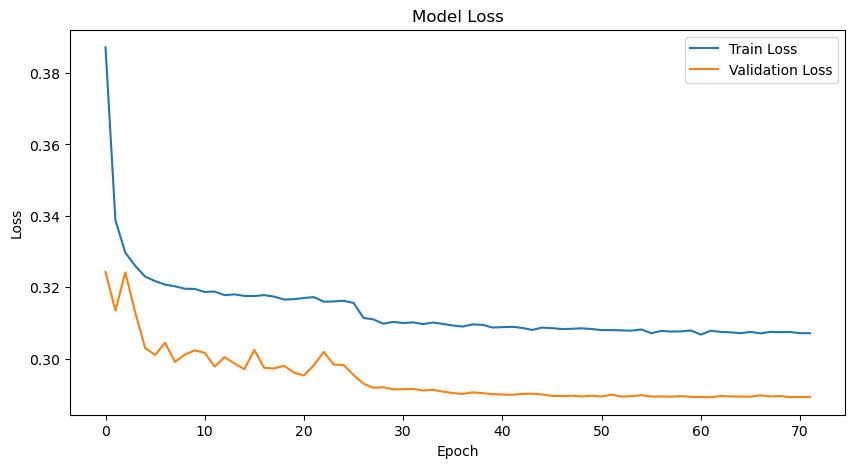

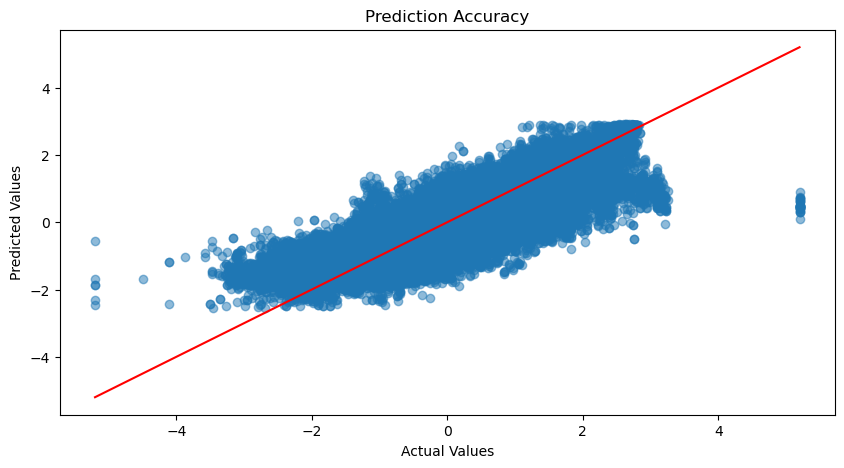

In [28]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Calculated indicators
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) on test data: {mse}')
print(f'Mean Absolute Error (MAE) on test data: {mae}')
print(f'R-squared Score (R2) on test data: {r2}')

# Inverse log-transformed predicted values
y_pred_inv_log = np.expm1(y_pred.flatten())  # Flatten in case y_pred has extra dimensions
y_test_inv_log = np.expm1(y_test)

# Calculate MAE and MSE on the original scale
mse_original = mean_squared_error(y_test_inv_log, y_pred_inv_log)
mae_original = mean_absolute_error(y_test_inv_log, y_pred_inv_log)


print(f'Mean Squared Error (MSE) on original data scale: {mse_original}')
print(f'Mean Absolute Error (MAE) on original data scale: {mae_original}')

# Plot Training & Validation Loss Values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotting Predicted Versus Actual Values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Prediction Accuracy')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction diagonal
plt.show()
